Filename: spec-1511-52946-0351.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     141   ()      
  1  COADD         1 BinTableHDU     26   3831R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   
  4  B2-00023182-00023180-00023181    1 BinTableHDU    146   2047R x 7C   [E, E, E, J, E, E, E]   
  5  B2-00023183-00023180-00023181    1 BinTableHDU    146

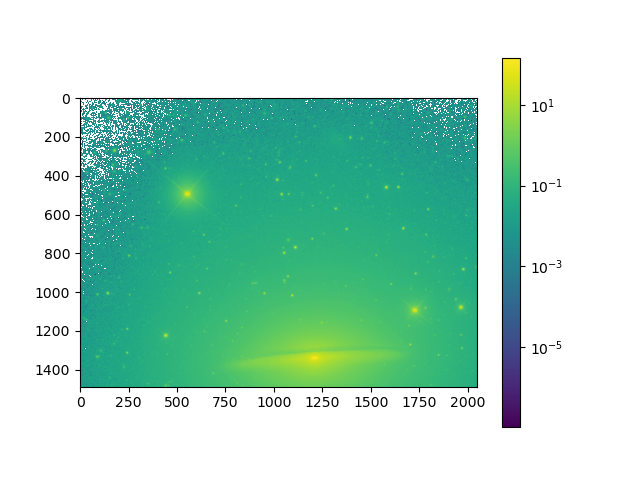

In [1]:
%matplotlib widget
from astropy.io import fits
from specutils import Spectrum1D
from astropy import units as u # to add unit to data
from astropy.visualization import quantity_support
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import bz2

decompressed_file = bz2.BZ2File("frame-i-006005-6-0085.fits.bz2")
image_file = fits.open(decompressed_file)
image_data = image_file[0].data
image_data = image_file[0].data

quantity_support()

hdulist = fits.open('spec-1511-52946-0351.fits') # the following data is from the galaxy Messier 77, with RA, DEC = 40.667382537, -0.011727034
hdulist.info()

data = hdulist[1].data #spectral data is usually stored in HDU with name COADD, which is index 1
#displaying the galaxy image
plt.figure()
plt.imshow(image_data, norm = LogNorm())
plt.colorbar()

In [3]:
hdulist[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3831 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

In [4]:
#extracting flux and wavelength
flux = data['flux']*10**-17*u.Unit('erg cm-2 s-2 AA-1')
wave = 10**data['loglam']*u.AA
spec = Spectrum1D(spectral_axis=wave, flux=flux) #this will put spectra in a single variable with units
spec.spectral_axis, spec.flux

(<SpectralAxis [3816.806 , 3817.684 , 3818.5623, ..., 9215.098 , 9217.223 , 9219.343 ] Angstrom>,
 <Quantity [2.5808501e-15, 2.8407482e-15, 2.9970397e-15, ..., 1.7807589e-15,
            1.7689096e-15, 1.7570594e-15] erg / (Angstrom cm2 s2)>)

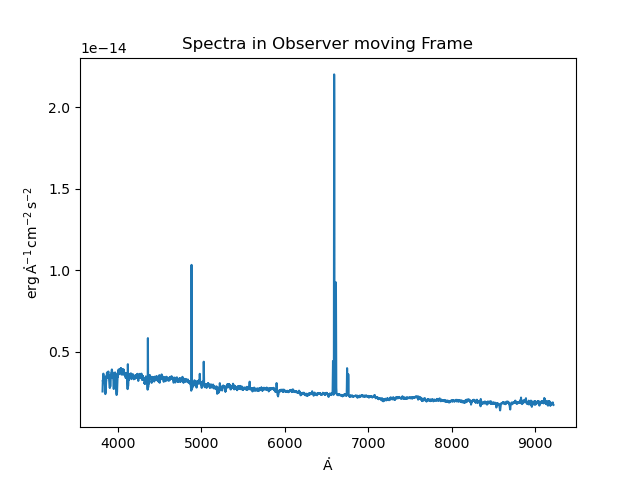

In [5]:
# now plotting it in observer frame
plt.figure()
plt.plot(spec.spectral_axis, spec.flux)
plt.title('Spectra in Observer moving Frame')
plt.show()

In [6]:
# now plotting spectra in rest frame by removing redshift
#finding redshift z
data2 = hdulist[2].data
data2['z'] #this will give redshift as z
#for getting spectra in rest frame, we have to apply the formula
# rest wave = wave/(1+z)

array([0.00419491], dtype=float32)

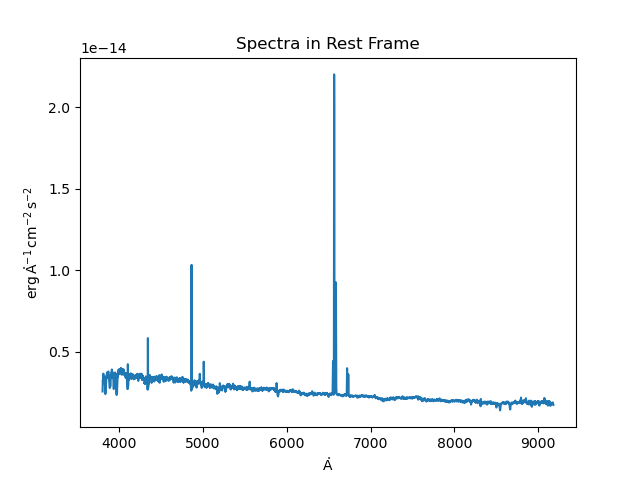

In [7]:
plt.figure()
plt.plot(spec.spectral_axis/(1+0.00419), spec.flux)
plt.title('Spectra in Rest Frame')
plt.show()

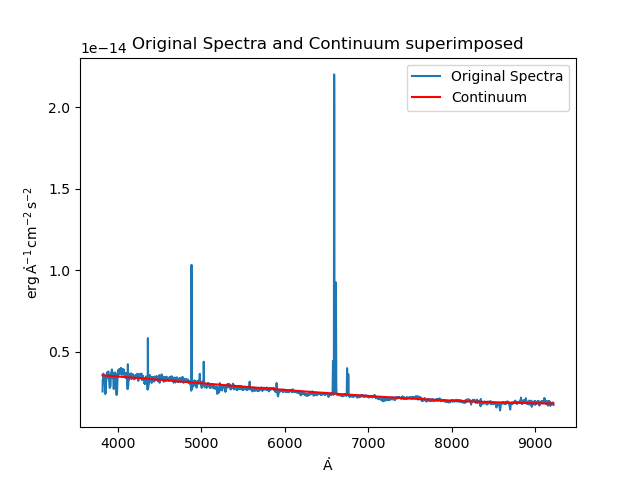

In [8]:
#now we need to subtract the continuum spectra to obtain the normalized spectra(spectra coming purely from the galaxy)
from specutils.fitting import fit_generic_continuum
s_fit = fit_generic_continuum(spec) # fitting continuum
#evaluate your fitted spectra
y_cont_fit = s_fit(wave)
#plotting continuum
plt.figure()
plt.plot(wave, flux, label='Original Spectra')
plt.plot(wave, y_cont_fit, c='red', label='Continuum')
plt.title('Original Spectra and Continuum superimposed')
plt.legend() 
plt.show()

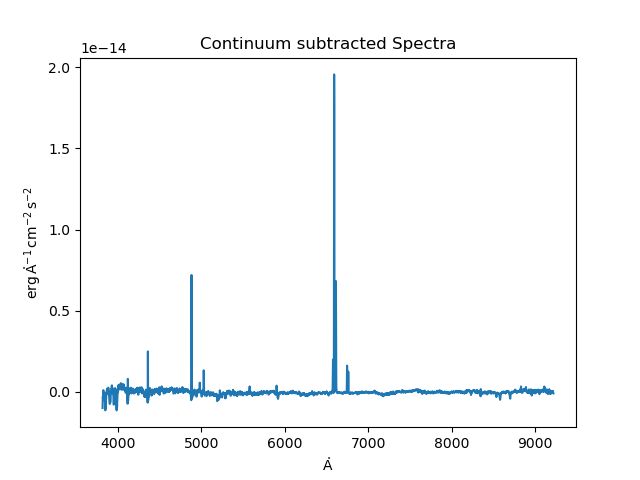

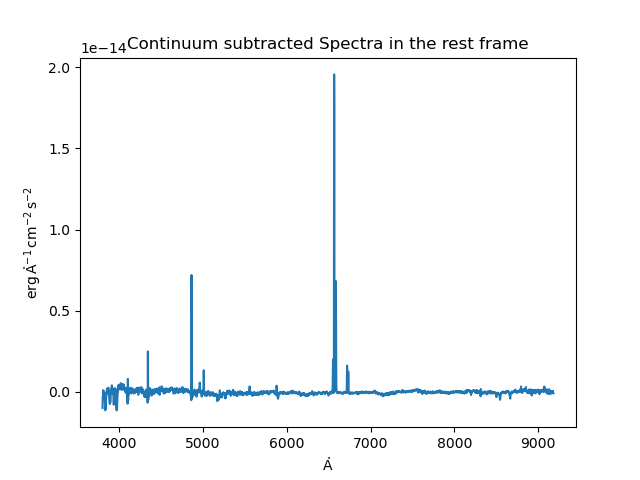

In [9]:
plt.figure()
plt.plot(wave, flux - y_cont_fit)
plt.title('Continuum subtracted Spectra')
plt.show()
#now we will plot this continuum subtracted spectrum in the rest frame
plt.figure()
plt.plot(wave/(1 + 0.00419491), flux - y_cont_fit)
plt.title('Continuum subtracted Spectra in the rest frame')
plt.show()

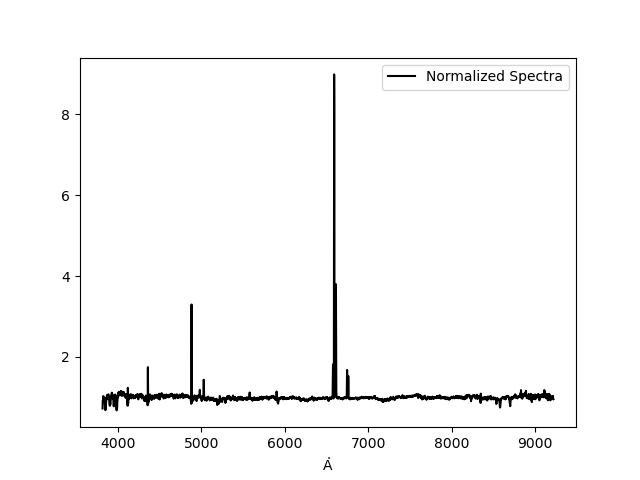

In [10]:
#now we will evaluate normalized spectra
spec_norm = spec/y_cont_fit
plt.figure()
plt.plot(spec_norm.spectral_axis, spec_norm.flux, label='Normalized Spectra', c='k')
plt.legend()
plt.show()

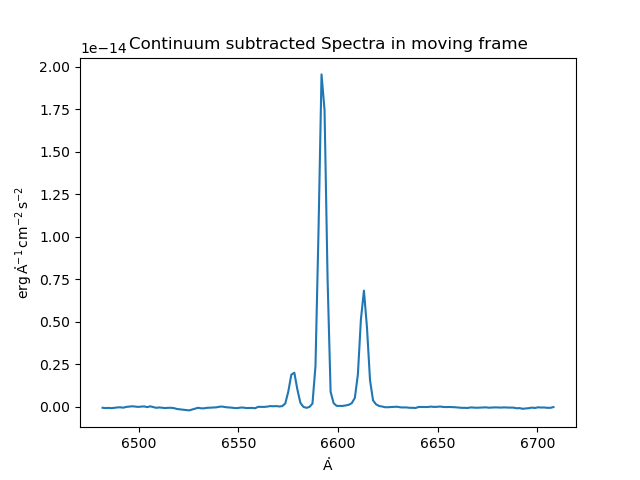

In [11]:
# now we will estimate the redshift of the galaxy using the normalized spectra
#first we plot a section of the continuum subtracted spectra again
plt.figure()
#we will only plot a small portion of this spectra
#this is to get the wavelength value of the H-alpha line in the moving frame
y_sec = flux[2300:2450] - y_cont_fit[2300:2450] 
x_sec = wave[2300:2450]
plt.plot(x_sec, y_sec)
plt.title('Continuum subtracted Spectra in moving frame')
plt.show()

In [12]:
#now we will find the indices where the flux peaks
#for that, we will import scipy library
from scipy.signal import find_peaks
#first we find the peaks of the small section containing the H-alpha line
i_peaks,_=find_peaks(y_sec)
#we also obtain the peaks for the full spectra
i_peaks_full,_ = find_peaks(flux - y_cont_fit)
print(i_peaks_full)
print(i_peaks)
y_full = flux - y_cont_fit

[   4    7    9   11   14   17   20   25   27   35   41   49   51   55
   60   63   69   73   78   85   87   90  101  109  113  115  117  125
  128  138  140  156  159  168  171  173  176  191  203  211  213  224
  231  236  241  245  254  257  265  269  275  277  279  283  287  295
  297  302  309  312  317  320  323  332  340  342  345  348  351  356
  361  370  379  381  384  387  389  393  397  399  402  408  410  412
  415  419  422  427  434  439  442  444  448  454  466  471  476  481
  486  489  494  500  506  514  517  520  523  530  538  541  543  550
  554  557  560  567  578  585  587  594  599  602  606  615  624  628
  630  635  639  642  645  648  656  658  662  670  676  682  687  692
  695  697  699  701  703  710  712  721  727  733  739  745  754  759
  765  772  777  779  785  793  798  802  806  808  813  818  820  825
  828  831  833  836  838  841  846  852  856  860  864  867  870  872
  880  882  887  891  898  901  904  909  911  914  917  923  925  928
  930 

In [13]:
#now that we have all the peaks, we will now find the wavelength for the maximum peak
i_max_peak=i_peaks[np.argmax(y_sec[i_peaks])]
i_max_peak #it will give the index of the highest peak

73

In [14]:
max_lambda = x_sec[i_max_peak]
max_lambda

<Quantity 6591.7393 Angstrom>

In [15]:
#now to evaluate the redshift of the galaxy, we apply the following formula
# z = (lambda(moving) - lambda(rest))/lambda(moving)
# we know that H-alpha line is 6564 Ang in rest frame\
z = (max_lambda-6564.61*u.AA) / (6564.61*u.AA)
print("The redshift of the given galaxy is:", z)

The redshift of the given galaxy is: 0.0041326533963937425


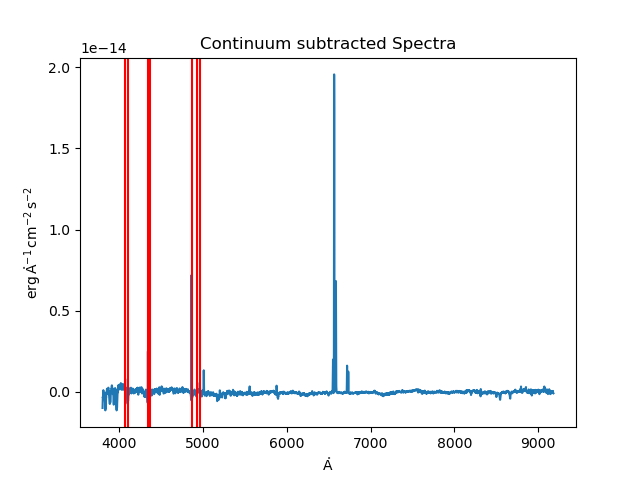

In [16]:
#now we will find and mark prominent lines in galaxy spectra
#first we take continuum subtracted galaxy spectra and then plot it in rest frame by taking into account the redshift
# https://classic.sdss.org/dr7/algorithms/linestable.php
lines = np.array([4072.3, 4102.89, 4341.68, 4364.436, 4862.68, 4932.603, 4960.295])
labels = ['S II','H delta','H gamma','O III','H beta','O III']
plt.figure()
x_cut = wave/(1 + 0.0041326533)
y_cut = flux - y_cont_fit
plt.title('Rest Frame Spectra')
plt.plot(x_cut, y_cut, label = 'Cont Subtracted Spectra')
plt.title('Continuum subtracted Spectra')
for i in range(len(lines)):
    plt.axvline(lines[i], c='r')
plt.show()
#here I plotted the 

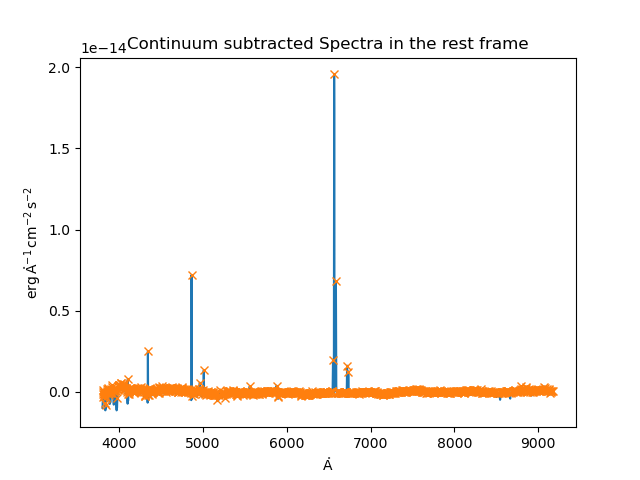

In [17]:
#plotting the peaks for the full spectra
x_full = wave/(1 + 0.00419491)
plt.figure()
plt.plot(wave/(1 + 0.00419491), flux - y_cont_fit)
plt.plot(x_full[i_peaks_full], y_full[i_peaks_full], "x") 
plt.title('Continuum subtracted Spectra in the rest frame')
plt.show()